In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
train_dir = 'C:/Users/Corrupted/Desktop/S_output/train'
test_dir = 'C:/Users/Corrupted/Desktop/S_output/test'
val_dir = 'C:/Users/Corrupted/Desktop/S_output/val'


In [3]:
class_name = []
for image_class in os.listdir(train_dir):
    class_name.append(image_class)
print(class_name)
print(f'Total Disease: {len(class_name)}')


['S_Bad', 'S_Good']
Total Disease: 2


In [4]:
train_data = image_dataset_from_directory(train_dir, label_mode="binary",
                                          image_size=(227, 227), batch_size=32,
                                          # color_mode='grayscale',
                                          shuffle=True, seed=42)
test_data = image_dataset_from_directory(test_dir, label_mode="binary",
                                         image_size=(227, 227), batch_size=32,
                                         # color_mode='grayscale',
                                         shuffle=False, seed=42)
val_data = image_dataset_from_directory(val_dir, label_mode="binary",
                                        image_size=(227, 227), batch_size=32,
                                        # color_mode='grayscale',
                                        shuffle=False, seed=42)


Found 1864 files belonging to 2 classes.
Found 269 files belonging to 2 classes.
Found 532 files belonging to 2 classes.


In [5]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=6,
                                              min_delta=0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2,
                                                 patience=4, min_lr=1e-7)


In [6]:
def AlexNet(input_shape, n_class):

    X_input = Input(shape=input_shape, name="input_layer")

    X = Conv2D(96, (11, 11), strides=4, name="conv0")(X_input)
    X = BatchNormalization(axis=3, name="bn0")(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=2, name='max0')(X)

    X = Conv2D(256, (5, 5), padding='same', name='conv1')(X)
    X = BatchNormalization(axis=3, name='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=2, name='max1')(X)

    X = Conv2D(384, (3, 3), padding='same', name='conv2')(X)
    X = BatchNormalization(axis=3, name='bn2')(X)
    X = Activation('relu')(X)

    X = Conv2D(384, (3, 3), padding='same', name='conv3')(X)
    X = BatchNormalization(axis=3, name='bn3')(X)
    X = Activation('relu')(X)

    X = Conv2D(256, (3, 3), padding='same', name='conv4')(X)
    X = BatchNormalization(axis=3, name='bn4')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=2, name='max2')(X)

    X = Flatten()(X)

    X = Dense(4096, activation='relu', name="fc0")(X)
    X = Dense(4096, activation='relu', name='fc1')(X)
    X = Dense(1, activation='sigmoid', name='output')(X)

    model = Model(X_input, X)

    return model


In [7]:
input_shape = (227, 227, 3)
n_class = len(class_name)
model = AlexNet(input_shape, n_class)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024  

In [8]:
# Display the Model
# ! pip install visualkeras
# import visualkeras
# visualkeras.layered_view(model)


In [9]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# model.compile(optimizer='adam', loss='squared_hinge',
#               metrics=['accuracy'])   # SVM


In [10]:
hist = model.fit(train_data, epochs=100, validation_data=val_data,
                 callbacks=[early_stop, reduce_lr])


Epoch 1/100
59/59 [==============================] - 92s 1s/step - loss: 5.5159 - accuracy: 0.6229 - val_loss: 13.7985 - val_accuracy: 0.6635 - lr: 0.0010
Epoch 2/100
59/59 [==============================] - 89s 1s/step - loss: 0.5293 - accuracy: 0.7355 - val_loss: 0.9249 - val_accuracy: 0.6297 - lr: 0.0010
Epoch 3/100
59/59 [==============================] - 98s 2s/step - loss: 0.4814 - accuracy: 0.7822 - val_loss: 0.6529 - val_accuracy: 0.7068 - lr: 0.0010
Epoch 4/100
59/59 [==============================] - 94s 2s/step - loss: 0.4511 - accuracy: 0.8020 - val_loss: 0.5580 - val_accuracy: 0.7613 - lr: 0.0010
Epoch 5/100
59/59 [==============================] - 92s 2s/step - loss: 0.4255 - accuracy: 0.8176 - val_loss: 0.4664 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 6/100
59/59 [==============================] - 93s 2s/step - loss: 0.4226 - accuracy: 0.8240 - val_loss: 0.4095 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 7/100
59/59 [==============================] - 94s 2s/step - loss: 0.

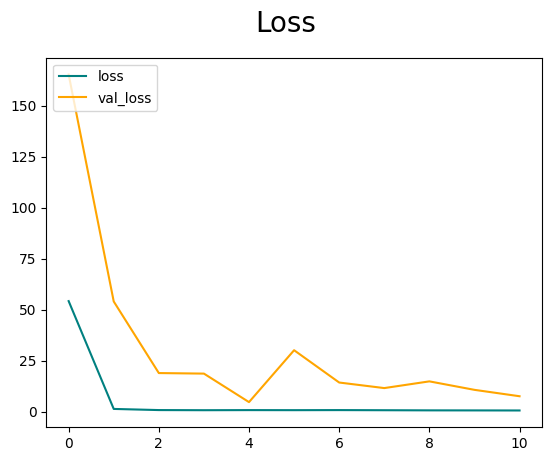

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


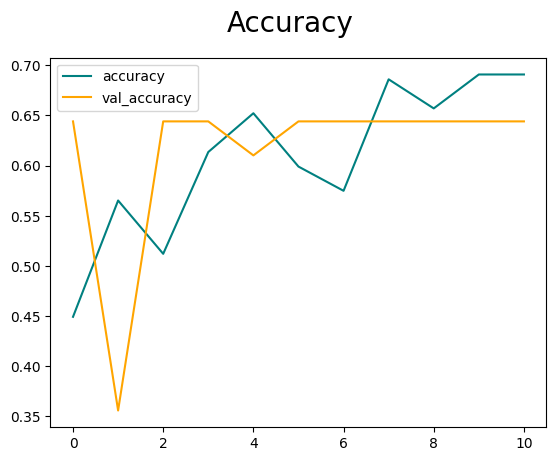

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [ ]:
print(f"Training Accuracy: {hist.history['accuracy'][-1]}")
print(f"Validation Accuracy: {hist.history['val_accuracy'][-1]}")


Training Accuracy: 0.6908212304115295
Validation Accuracy: 0.6440678238868713


In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Loss: {test_loss}\nTest Accuracy: {test_acc}')